In [1]:
from Non_stationary.setting import Setting
from Non_stationary.environment import Environment
from Non_stationary.seller_sliding import SellerSliding
from plotting import plot_all, plot_cumulative_regret_by_distribution, plot_ucb_product0_by_distribution
import numpy as np

In [3]:
setting = Setting(
    T=1000,  # Set the total number of rounds
    n_products=3,  # Set number of products
    epsilon=0.2,  # Price granularity
    distribution='gaussian',  # Choose distribution (uniform, gaussian, etc.)
    verbose='seller',  # Optional verbosity level
    B=None,  # Production capacity (can be None to auto-calculate)
    budget_constraint="lax",
    non_stationary='slightly',  # Or 'highly' based on your scenario
    algorithm='ucb_sliding',  # This activates the sliding window UCB
    sliding_window_size=100  # Sliding window size
)


In [4]:
# Create the environment with the chosen setting
env = Environment(setting)

c:\Users\shrav\Desktop\Polimi\Sem2\OLA\Project_OLA\ola-proj-2425\Non_stationary\seller_sliding.py:46: RuntimeWarning: invalid value encountered in divide
  means + np.sqrt(2 * np.log(total_counts) / counts),
c:\Users\shrav\Desktop\Polimi\Sem2\OLA\Project_OLA\ola-proj-2425\Non_stationary\seller_sliding.py:46: RuntimeWarning: divide by zero encountered in divide
  means + np.sqrt(2 * np.log(total_counts) / counts),


DEBUG -- chosen_prices: [0.1 0.1 0.1]
type: <class 'numpy.ndarray'>
shape: (3,)
DEBUG -- budget_constraint returning: [0 1 1]
DEBUG -- budget_constraint return shape: (3,)
DEBUG -- budget_constraint return dtype: int32
DEBUG -- ucb shape: (3, 5)
DEBUG -- i: 0, action: 0, type: <class 'numpy.int32'>
DEBUG -- i: 1, action: 1, type: <class 'numpy.int32'>
DEBUG -- i: 2, action: 1, type: <class 'numpy.int32'>
DEBUG -- purchased: [0 1 1]
type: <class 'numpy.ndarray'>
shape: (3,)
DEBUG -- purchased dtype: int32
DEBUG -- purchased[0] type: <class 'numpy.int32'>
DEBUG -- final purchased_clean: [0 1 1]
DEBUG -- purchased_clean shape: (3,)
DEBUG -- self.purchases row shape: (3,)
Error in round 0: setting an array element with a sequence.
DEBUG -- chosen_prices: [0.325 0.1   0.1  ]
type: <class 'numpy.ndarray'>
shape: (3,)
DEBUG -- budget_constraint returning: [0 1 1]
DEBUG -- budget_constraint return shape: (3,)
DEBUG -- budget_constraint return dtype: int32
DEBUG -- ucb shape: (3, 5)
DEBUG -- i:

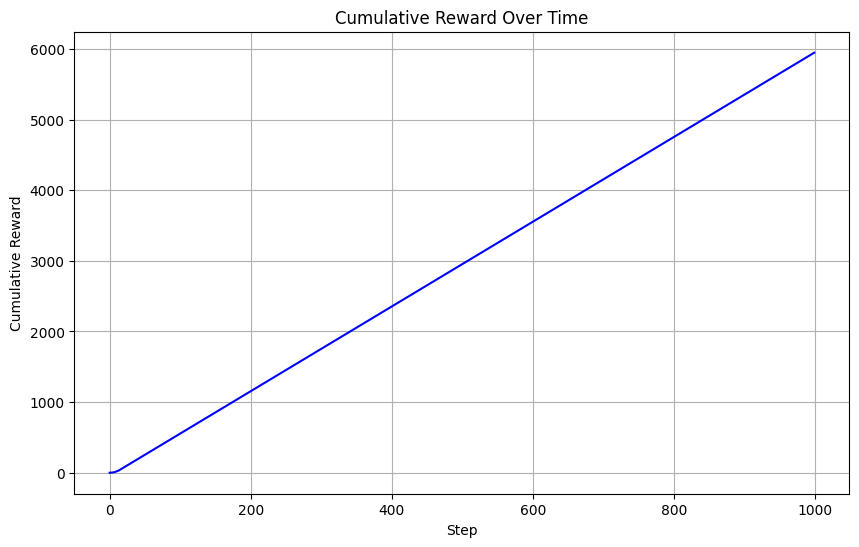

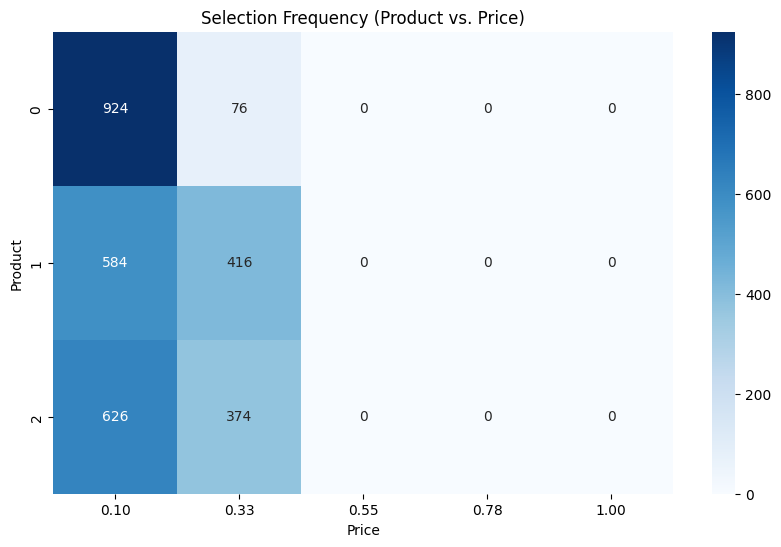

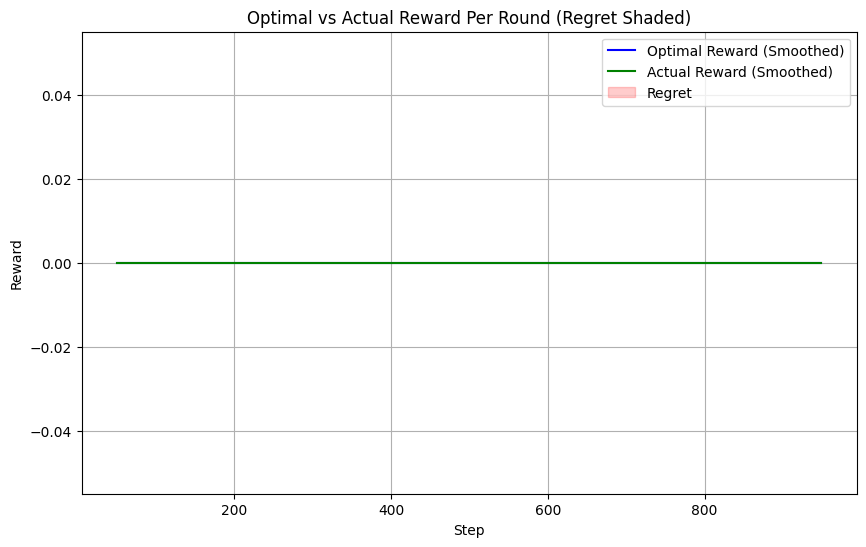

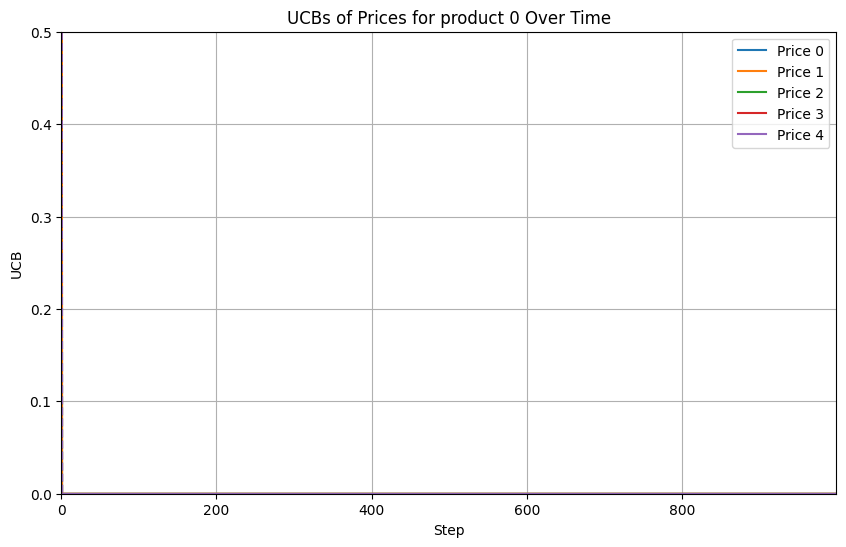

In [5]:
# Run the simulation
env.play_all_rounds(plot=True)

In [ ]:
#plot_cumulative_regret_by_distribution(setting.T, env.regrets, n_trials=20)


import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(env.regrets))
plt.title("Cumulative Regret (Sliding Window UCB)")
plt.xlabel("Round")
plt.ylabel("Cumulative Regret")
plt.grid(True)
plt.show()


In [ ]:
# Plot UCB values for product 0
#plot_ucb_product0_by_distribution(env.ucb_history)

import seaborn as sns
import matplotlib.pyplot as plt

# UCB values for Product 0 across time
ucbs_product0 = env.ucb_history[:, 0, :]

plt.figure(figsize=(12, 6))
sns.heatmap(ucbs_product0.T, cmap="viridis", cbar=True)
plt.title("UCB Values Over Time for Product 0")
plt.xlabel("Time Step")
plt.ylabel("Price Index")
plt.show()
